In [1]:
#refences
#https://phik.readthedocs.io/en/latest/

In [ ]:
#Loading packges

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
sns.set_style(style="whitegrid")

In [ ]:
#Loding Dataset

data = pd.read_csv('/content/drive/My Drive/Case-Study 2 /Datasets/equip_failures_training_set.csv')
print("Shape of data: ",data.shape)

Shape of data:  (60000, 172)


In [ ]:
data.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


##Exploratory Data Analysis:-

From Our Dataset we will not use the Histogram bin columns in our Case study because it contains time based histogram bin's data and which is not well structure, so we will drop this columns. 

In [ ]:
#Dropping the Histogram Columns

measured_cols = [col for col in data.columns if col.find('histogram')==-1]
histogram_cols = data.shape[1] - len(measured_cols) 

print("No. of measured columns: ", len(measured_cols))
print("No. of histogram columns: ", histogram_cols)

data = data.loc[:, measured_cols]
data = data.iloc[:, 1:]
data = data.replace('na',np.NAN)
#final shape of the data after removing the histogram columns 
print("Final Shape: ", data.shape)

No. of measured columns:  102
No. of histogram columns:  70
Final Shape:  (60000, 101)


Number of negative(not-failure) class:  59000
Number of positive(failure) class:      1000


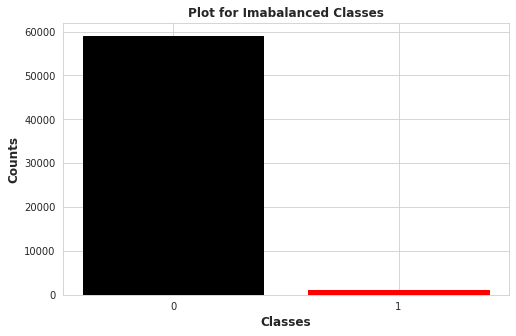

In [ ]:
#Checking the Class Imbalance Issue

print("Number of negative(not-failure) class: ", data['target'].value_counts()[0])
print("Number of positive(failure) class:     ", data['target'].value_counts()[1]) 

fig = plt.figure(figsize=(8,5))
plot = plt.bar(['0','1'],[data['target'].value_counts()[0], data['target'].value_counts()[1]])
plt.title("Plot for Imabalanced Classes", fontsize=12, fontweight='bold')
plot[0].set_color('k')
plot[1].set_color('r')
plt.xlabel('Classes', fontsize=12, fontweight='bold')
plt.ylabel('Counts', fontsize=12, fontweight='bold')
plt.show()

Here in this class imbalaced plot, we can clearly notice that classes are highly imbalanced , we have only 1000 positive datapoints which carries the data values when the equipment failure was occured, so we know that machine learning model becomes easily biased and produce very low recall value for minority class when we carries the class imabalaced problem in our dataset..

So, to solve this problem we can follow two approaches:
1) UpSampling
2) DownSampling 

any one approch we can use or maybe we can use both approches in such a manner that foe example , we can downsample the majority(Negative in our case) class up to 30,000 and upsample the minority(Positive class in our case) class upto 20,000-25,000 so that we can achieve good recall and precision values with machine learning model for both classes, we will implement one of these when we will actually start the preparations for Data-preprocessing and Model Training once we will done with EDA and feature Selection process.


##Data Cleaning

Data shape after removing all raw which contains atleast one Nan-value:  (593, 101)


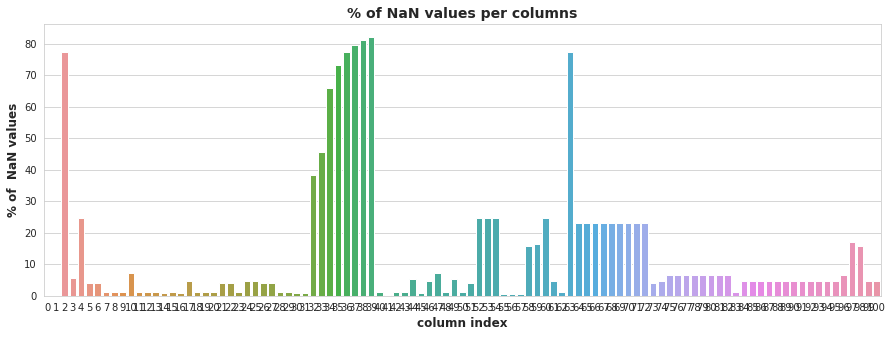

In [ ]:
tmp = data.dropna(axis=0)
print("Data shape after removing all raw which contains atleast one Nan-value: ", tmp.shape)
fig = plt.figure(figsize=(15,5))
sns.barplot(np.arange(len(data.columns)), [(value/len(data))*100 for value in data.isna().sum()])
plt.title('% of NaN values per columns', fontsize=14, fontweight='bold')
plt.xlabel('column index', fontsize=12, fontweight='bold')
plt.ylabel('% of  NaN values', fontsize=12, fontweight='bold')
plt.show()

this plot shows the percentage of Nan value in each column , it is clear that there are plenty of Nan values in our dataset, and there are almost 24-25 columns which carries more than 20% of Nan values, so we have find out a way to get rid of these Nan values.

there is one of the most basic solution is to drop the columns which carries atleast one Nan value , but applyting that operation we just left with only 593 raws out of 60,000 , which means there are only 1% raw which does not have any Nan-value, so that it may lead us towards the very high data-loss

That's why we have to find the optimal threshold percentage value by looking at this plot, so that we remove those columns which carries Nan-value percentage more than that choosen threshold and replace the Nan-value with constants in rest of other columns, But..

## But how can we select that threshold ??


Here, we have selected some threshold values like [5,10,20,30,40,50,60,70,80] using which we are going to perform some experioments on data to check how this Duming of Nan-value affects on 

##1) Class Distibution 
##2) Dimentionality of Data

but you will ask why did i selected the 80 as maximum because there are few columns which has Nan-values between 80-85%.

so here in this plot annotation of each scatter point suggests the threshold value that we have selected for dropping the columns and after droping those columns which contains Nan value more than the percentage of that annoted threshold , 

we dropped the raws which carries atleast 1 Nan value , because previously we have seen that if we directly drops the raws then we are loosing 99% of datapoints because of some columns which carries more than 50% of Nan values within it's, so that first we have dropped those columns and then we dropped the raws to check wheather it is affecting on class imbalance issue or not 

In [ ]:
#Function to remove the columns which have more then given % of NaN values within it 
def RemoveNaN(percentage, data, replace=False):
  selected_cols = []
  for idx, value in enumerate([value/len(data)*100 for value in data.isna().sum()]):
    if value < percentage:
      selected_cols.append(idx)

  final_data = data.loc[:, data.columns[selected_cols]]
  if replace==True:
    final_data = final_data.dropna(axis=0)
  return final_data, final_data['target'].value_counts()[1], final_data['target'].value_counts()[0], final_data.shape, selected_cols

In [ ]:
#Getting the results with various number of threshold and will plot those results in next plot

results={}
percentages = [5,10,20,30,40,50,60,70,80]
for i in percentages:
  final_data, pos, neg, shape,_ = RemoveNaN(i, data, True)
  results[i] = [pos, neg, shape[0]/10, shape[1]]

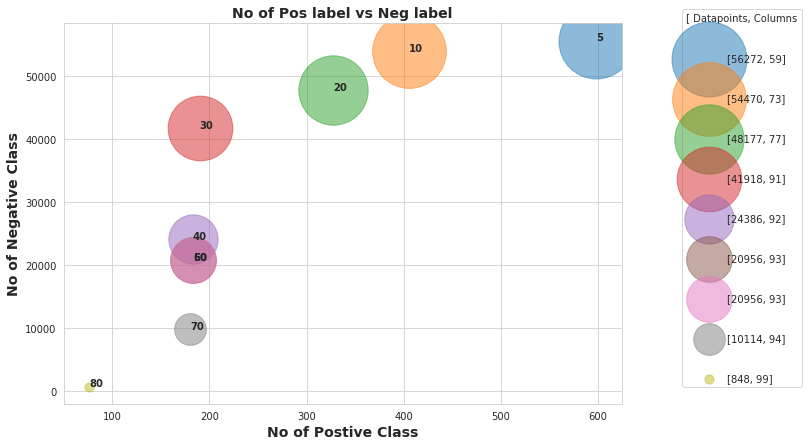

In [ ]:
#Plotting the results of experiments with various threshold values

fig = plt.figure(figsize =(10, 7)) 
values = np.array(list(results.values()))
for idx ,val in enumerate(zip(values[:,0], values[:,1], values[:,2], values[:,3])):
    plt.scatter(val[0], val[1], s=val[2], alpha=0.5, label=[int(val[2]*10), int(val[3])])
    plt.annotate(percentages[idx], (val[0], val[1]), fontsize=10, fontweight='bold')

plt.legend(bbox_to_anchor=(1.1, 1.05),labelspacing=3, title = '[ Datapoints, Columns')
plt.xlabel("No of Postive Class", fontsize = 14,fontweight ='bold')
plt.ylabel("No of Negative Class", fontsize = 14,fontweight ='bold')
plt.title('No of Pos label vs Neg label',  
                fontsize = 14, fontweight ='bold') 
plt.show() 

in this plot, we can analyze that if we first dropps the columns using 80% as threshold , then we are getting rid from the class imbalanced problem but we only lefts with the 848 datapoints with 99 columns , which may cause the curse dimentionality issue in model training so it is not good threshold value, 

and we choose 5% as threshold then it clear that we won't have to face datapoints loss , because with 5% we will have ~56,000 datapoints but , if you have noticed or not but we lost the almost ~40-41 columns and classes are also highly imbalanced by selecting 5% we are loosing around 400 datapoints from class-1(possitive) , which is also not prefered value to drop the columns 

so after speding some time on selecting optimal threshold value to droped the Columns, i found that 20% as a threshold 

after selecting the threshold we have dropped the columns which was carrying more than 20% of Nan values, and 

then we will impute the constant in rest of Nan values based on it's column mean or median values.

In [ ]:
#selecting the columns which has less 20% of NaN value
final_data,_,_,_,selected_cols = RemoveNaN(20, data, False)
final_data = data.iloc[:, selected_cols]
final_data = final_data.astype('float')

impute = SimpleImputer(strategy='most_frequent')

#replacing the Nan values with most frequent values of that column
impute.fit(final_data.values)
final_data.iloc[:,:] = impute.transform(final_data.values)

##Feature Selection Using (Phi_k Correlation):-


In [ ]:
#Calculatinf the Phi_k correlation matrix

import phik
phi_k = final_data.phik_matrix()

interval columns not set, guessing: ['target', 'sensor1_measure', 'sensor3_measure', 'sensor5_measure', 'sensor6_measure', 'sensor8_measure', 'sensor9_measure', 'sensor10_measure', 'sensor11_measure', 'sensor12_measure', 'sensor13_measure', 'sensor14_measure', 'sensor15_measure', 'sensor16_measure', 'sensor17_measure', 'sensor18_measure', 'sensor19_measure', 'sensor20_measure', 'sensor21_measure', 'sensor22_measure', 'sensor23_measure', 'sensor27_measure', 'sensor28_measure', 'sensor29_measure', 'sensor30_measure', 'sensor31_measure', 'sensor32_measure', 'sensor33_measure', 'sensor34_measure', 'sensor35_measure', 'sensor44_measure', 'sensor45_measure', 'sensor46_measure', 'sensor47_measure', 'sensor48_measure', 'sensor49_measure', 'sensor50_measure', 'sensor51_measure', 'sensor52_measure', 'sensor53_measure', 'sensor54_measure', 'sensor55_measure', 'sensor59_measure', 'sensor60_measure', 'sensor61_measure', 'sensor62_measure', 'sensor63_measure', 'sensor66_measure', 'sensor67_measure',

/usr/local/lib/python3.6/dist-packages/phik/data_quality.py:69: UserWarning: Not enough unique value for variable sensor54_measure for analysis 1. Dropping this column
  .format(col, df[col].nunique())


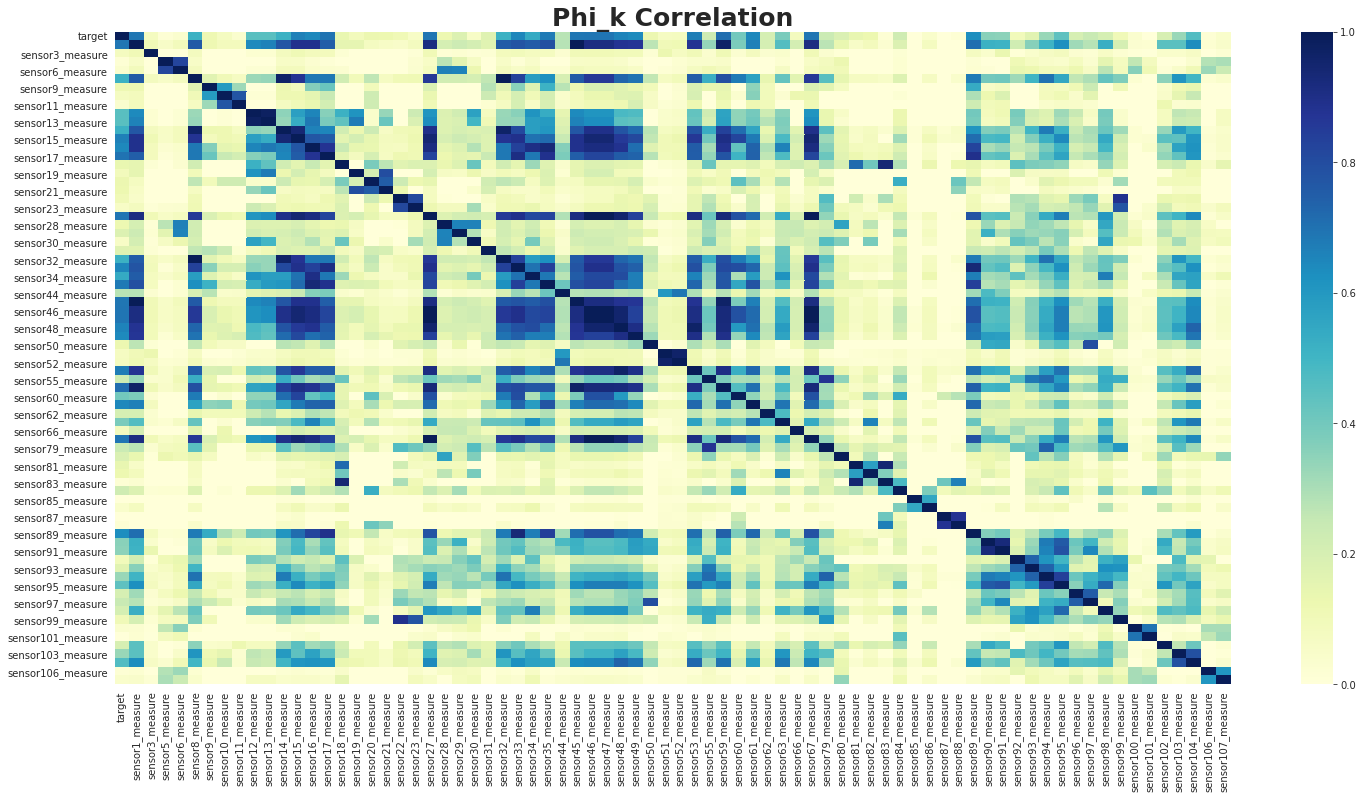

In [ ]:
#Plotting the heatmap of correlation matrix 

fig = plt.figure(figsize=(25,12))
sns.heatmap(phi_k, cmap="YlGnBu")
plt.title('Phi_k Correlation', fontsize = 25,fontweight ='bold')
plt.show()

Above Heatmap shows the Phi_K matrix, but we can't analyze, how much columns should we select by just looking at this heatmp, but yeah we can say we some points in first columns which shows more than 50 of correlation value with targeted column..   

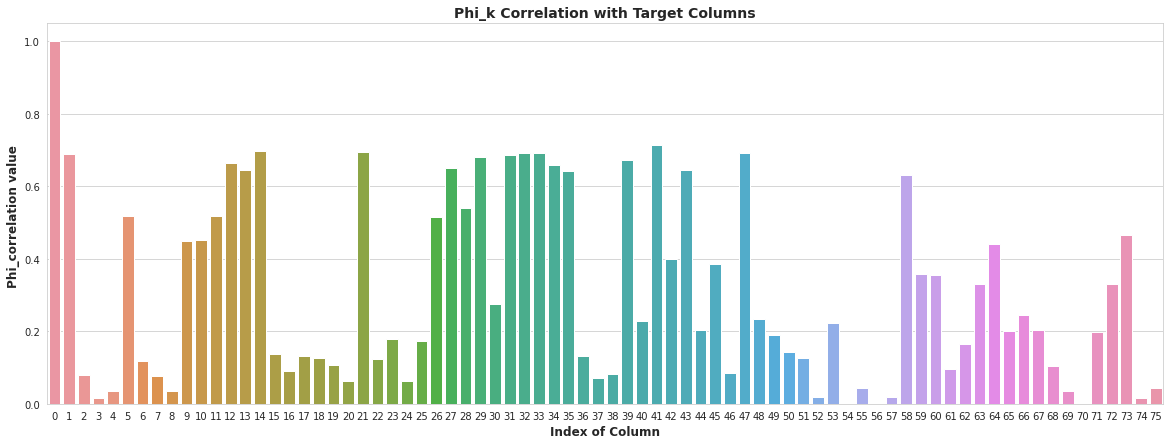

In [ ]:
#Checking that which column is correlative with target column more than 0.50

fig = plt.figure(figsize=(20,7))
sns.barplot(np.argsort(phi_k.iloc[:, 0].values)[::-1], np.sort(phi_k.iloc[:, 0].values)[::-1])
plt.title('Phi_k Correlation with Target Columns', fontsize=14, fontweight='bold')
plt.xlabel('Index of Column', fontsize=12, fontweight='bold')
plt.xticks(rotation=70)
plt.ylabel('Phi_correlation value ', fontsize=12, fontweight='bold')
plt.show()

  in Phi_k Correlation Method column is highly Correlative when it Phi_k correlation value is near to 1 and less Correlative when it nears to 0.

  Finally, Based on this barplot, it is cleared that we can exctract the top 15 features those are highly correlated with the target Column, here in this plot first bar suggest the correlation of target variable with itself, we can avoid it,so after avoing the 1st column, we are going to select top 15 feature, which has correlation value more 0.60 with target column.

In [ ]:
#Selecting features based on the Phi_k matrix 

select_data = final_data.iloc[:,np.sort(np.argsort(phi_k.iloc[:, 0].values)[::-1][:16])]
select_data.to_csv('/content/drive/My Drive/Case-Study 2 /Datasets/Selected_data.csv', index=False)
print("Shape of Data after selection Features: ",select_data.shape)

Shape of Data after selection Features:  (60000, 16)


In [ ]:
#Save the .csv file which will have only selected features

select_data['target'] = select_data['target'].astype('object')
select_data.to_csv('/content/drive/My Drive/Case-Study 2 /Datasets/Selected_data.csv', index=False)

##Univariate Analysis

In [ ]:
select_data = pd.read_csv('/content/drive/My Drive/Case-Study 2 /Datasets/Selected_data.csv')

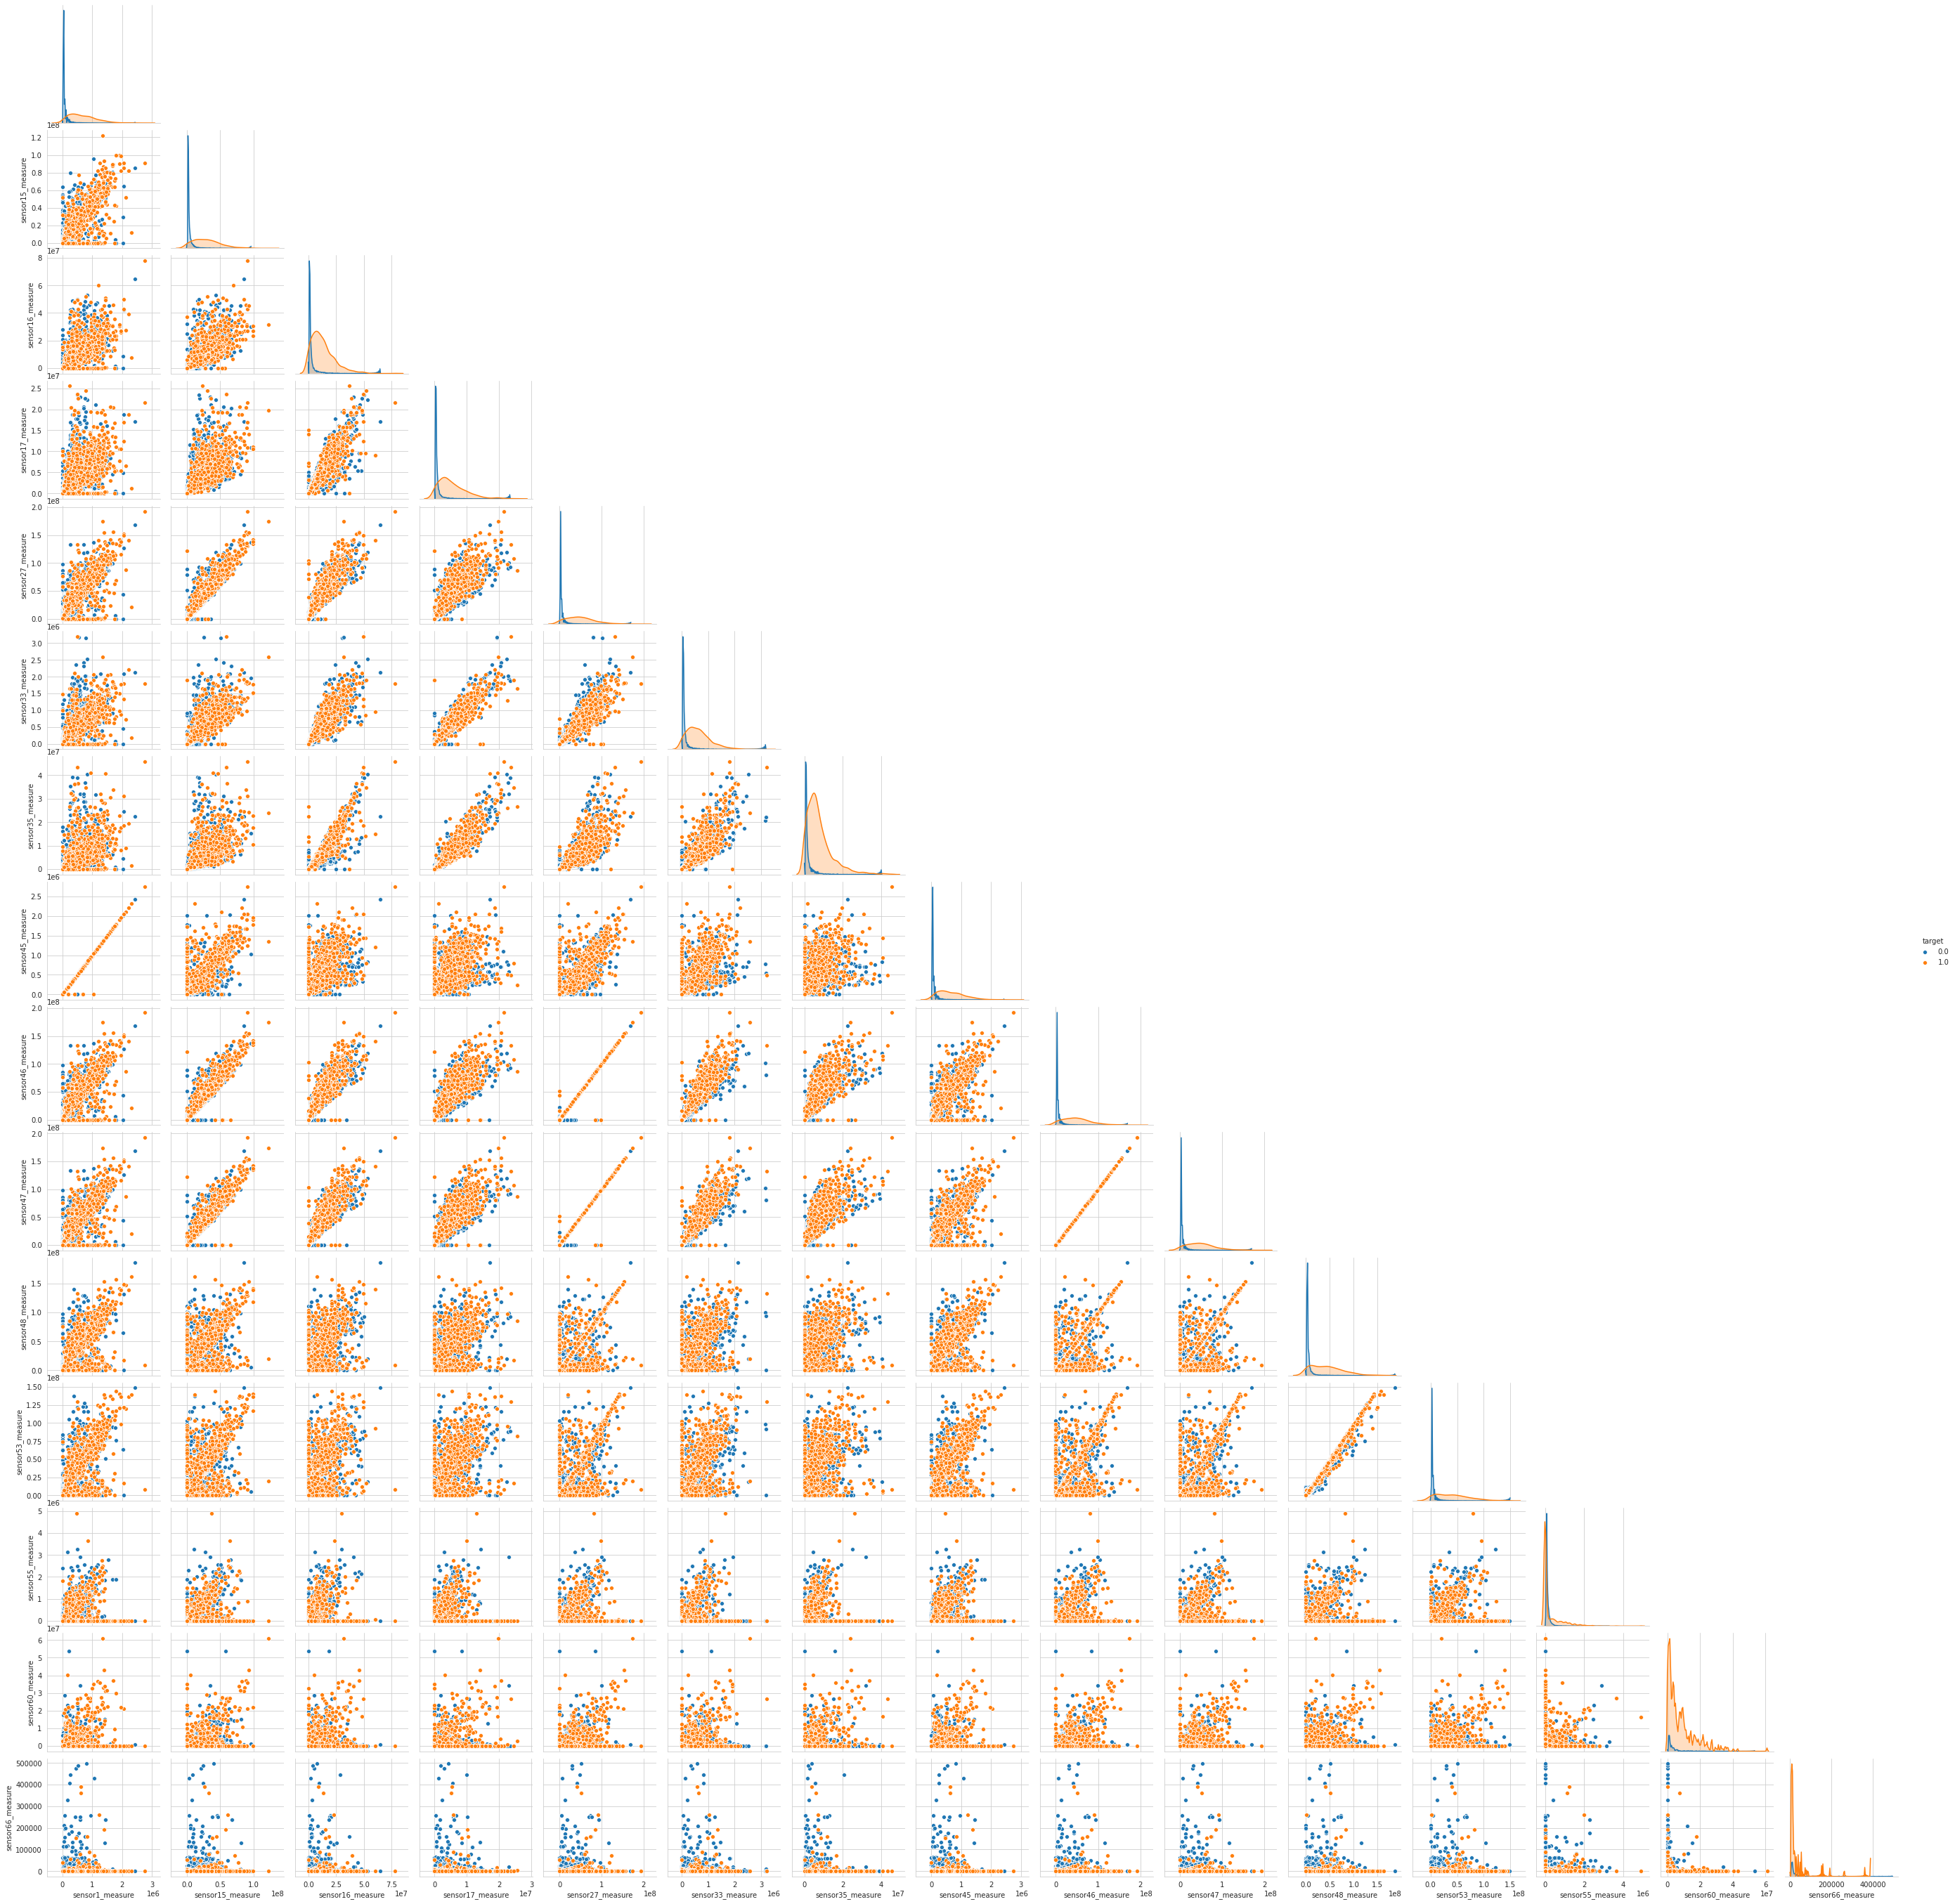

In [ ]:
#Pairplot
sns.pairplot(select_data, hue='target', corner=True)

  After looking at the above Pairplot in deligent manner, we find only one feature called "sensor66_measure" that can saperate the positive and negative class by making pair with any rest of column, so that we can conclude that internal pair between feature can not classify data easily , therefore we can't make prediction models using only two columns , there may have chances that using all selected columns into training a good ML model we can get good precision and recall , that we would not achieve using only two features without train any model, because it is like may be in higher dimension positive and negative classes can be classifed by streching the decision boundary using ML models, Currently, which might not possible with just only 2 dimesion of data in paiplot 

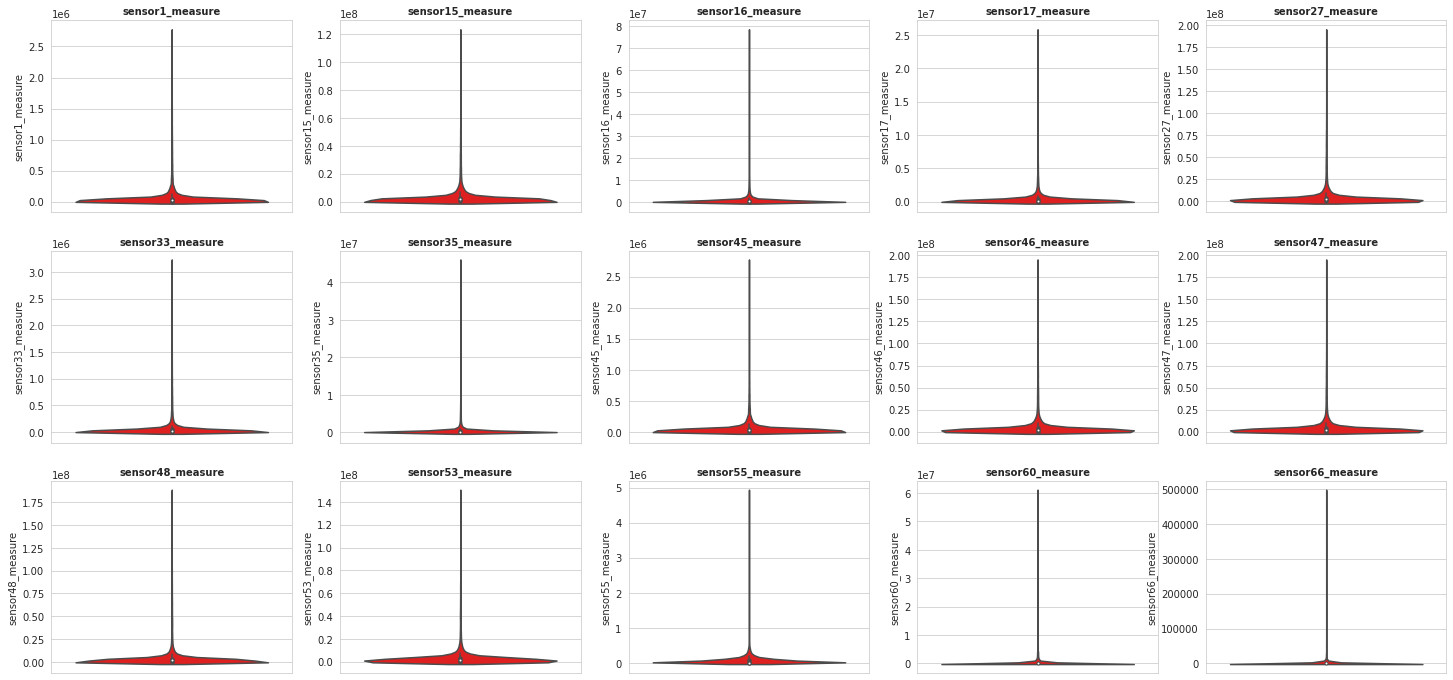

In [ ]:
#Barplot

fig, ix = plt.subplots(nrows=3, ncols=5, figsize=(25,12))
idx = 1

for raw in range(3):
    for col in range(5):
        plt.subplot(3, 5, idx)
        sns.violinplot(x=select_data.columns[idx], data=select_data, orient='v', color='r')
        plt.title(select_data.columns[idx], fontsize=10, fontweight='bold')
        idx+=1
plt.show()

In these plot we can see the violin plots for each feature column, and we have noticed one thing that each column contains the some amount of outliers, that we have detect and remove specially if it is from negative class, because number of points in Negative class is very high as compare to the Positive class, and if we toss the dataset for training with ouliers especially from the Negative class then Prediction model will become biased the Mejority class(in our case Negative Class)

therefore, further try to detect and remove the outliers of the Negative class and we will put as it is the positive class's outliers because it will help use to make model equally biased for both classes

##Detecting the Outliers:


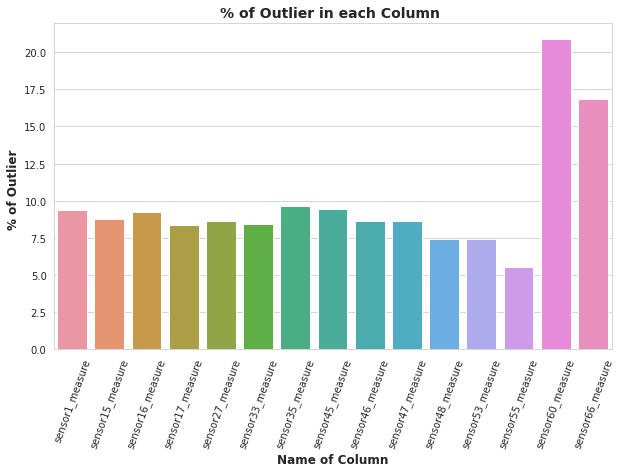

In [ ]:
#Outliear Detection and showing the % of Outliears in each columns By Data-Visualisation

outlier=[]
for i in range(1, select_data.shape[1]):
  Q1 = np.quantile(select_data.iloc[:, i],0.25)
  Q3 = np.quantile(select_data.iloc[:, i],0.75)
  IQR = Q3-Q1
  outlier.append(len([val for val in select_data.iloc[:,i].values if val < (Q1 - 1.5 * IQR) or val > (Q3 + 1.5 * IQR)]))

outlier = np.array(outlier)/60000*100
fig = plt.figure(figsize=(10,6))
sns.barplot(select_data.columns[np.arange(1, select_data.shape[1])], outlier)
plt.title('% of Outlier in each Column ', fontsize=14, fontweight='bold')
plt.xlabel('Name of Column', fontsize=12, fontweight='bold')
plt.xticks(rotation=70)
plt.ylabel('% of Outlier ', fontsize=12, fontweight='bold')
plt.show()

  So Here in above plot it's clear that almost all columns have outliers and most of them carries more than 5% of outliers. so if we will remove these outlier points then we might have to face loss of datapoint and will have less than 1000 of datapoints out of 60000 datapoints, and it will also increased class imbalanced problem,if it removes the outlier of minority class(Positive) then

  so, we can do one thing in, future when we will start to developing a model for prediciton at that time we have to do undersampling on majority class which is negative class in our case, so somehow it will alliviate the problem of outliers and class imbalance,therefore we wil remove the outliers of only negative class so that it will decresed the number of negative class points

##Remove Outliers of only Negative class

In [ ]:
#Remove Outliers of only Negative class

negative_df = select_data[select_data['target']==0.0]

all = []
for i in range(1, negative_df.shape[1]):
  index=[]
  Q1 = np.quantile(select_data.iloc[:, i],0.25)
  Q3 = np.quantile(select_data.iloc[:, i],0.75)
  IQR = Q3-Q1
  index.extend([idx for idx, val in enumerate(select_data.iloc[:,i].values) if val < (Q1 - 1.5 * IQR) or val > (Q3 + 1.5 * IQR)])
  all.extend(index)

print('Number of outliers datapoints from negative class : ',len(set(all)))

Number of outliers datapoints from negative class :  24664


In [ ]:
#Removing Outliers of Negative class and creating new data file and the save it..

lst = set(all)
sel = [index for index in range(negative_df.shape[0]) if index not in lst]
negative_df = negative_df.iloc[sel, :]

positive_df = select_data[select_data['target']==1.0]

final_data = pd.concat([positive_df, negative_df]).sample(frac = 1) 
final_data.to_csv('/content/drive/My Drive/Case-Study 2 /Datasets/final_data.csv',index=False)
print("Shape of Final : ", final_data.shape)
print("Class-Distribution:\n", final_data.target.value_counts())

Shape of Final :  (35735, 16)
Class-Distribution:
 0.0    34735
1.0     1000
Name: target, dtype: int64


After removing the outliers from the negative class , we can see that the number of datapoints of negative class has decreased from 59,000 to 34,735 , Further we will UpSample the positive class's datapoints from 1,000 to 20,000 using Upsampling methods   

##Conclusion:-
  So, here i think we can end the EDA & Feature Selection process, because here in in this notebook we have analyze our data with by checking it's NaN value, class-imbalaced, Feature Selection using Phi_k matrix and then we performed Univariate Anlysis, and after it we check outliers and removed them very deligenty so that it doesn't affect the minority class....
  Next we are ready to start machine learning experiments to check. 